In [97]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [64]:
%matplotlib inline

In [65]:
df = pd.read_csv('./data/DP_LIVE_16092018222212235.csv')

In [71]:
df_code = pd.read_csv('./data/iso-codes.csv')

In [73]:
d_code = {}
for i in df_code.iterrows():
    d_code[i[1]['alpha-3']] = i[1]['name']

In [66]:
sub_list = list(df['SUBJECT'].unique())
print(sub_list)

['LAWDOMVIOL', 'LAWRAPE', 'LAWSEXHARASS', 'ATTITUDEVIOL', 'PREVVIOLLIFETIME']


In [67]:
df_l = []
for i in sub_list:
    df_t = df[df['SUBJECT'] == i]
    df_t[i] = df['Value']
    df_t = df_t[['LOCATION', i]]
    df_l.append(df_t)

/home/jfm/anaconda3/envs/colombiaendato/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [38]:
df_def = df_l[0]

In [233]:
#for i in range(1,len(df_l)):
#    df_def = pd.merge(df_def, df_l[i], on='LOCATION')
df_def = pd.merge(df_l[3], df_l[4], on='LOCATION')

In [236]:
df_def['full_name'] = df_def['LOCATION'].apply(lambda x:d_code[x])

In [225]:
for l in list(df_def['LOCATION'].unique()):
    print("%s\t%s" % (l, d_code[l]))

ALB	Albania
ARM	Armenia
AUS	Australia
AZE	Azerbaijan
BFA	Burkina Faso
BGD	Bangladesh
BGR	Bulgaria
BLR	Belarus
BOL	Bolivia
BRA	Brasil
CAN	Canadá
CHE	Switzerland
CHL	Chile
CHN	China
CMR	Cameroon
COD	Congo
COL	COLOMBIA
DEU	Alemania
DOM	R. Dominicana
ECU	Ecuador
EGY	Egypt
ESP	España
EST	Estonia
ETH	Etiopía
FIN	Finland
FRA	Francia
GAB	Gabon
GBR	United Kingdom of Great Britain and Northern Ireland
GEO	Georgia
GHA	Ghana
GNQ	Equatorial Guinea
GTM	Guatemala
HTI	Haití
HUN	Hungary
IND	India
ITA	Italy
JAM	Jamaica
JOR	Jordania
JPN	Japan
KEN	Kenya
KHM	Cambodia
LBN	Lebanon
LBR	Liberia
MDA	Moldova (Republic of)
MEX	México
MKD	Macedonia (the former Yugoslav Republic of)
MOZ	Mozambique
MWI	Malawi
NAM	Namibia
NGA	Nigeria
NIC	Nicaragua
NLD	Netherlands
NOR	Norway
NPL	Nepal
NZL	New Zealand
PAK	Pakistan
PER	Perú
PHL	Philippines
POL	Poland
ROU	Romania
RUS	Russian Federation
RWA	Rwanda
SDN	Sudan
SRB	Serbia
SVN	Slovenia
SWE	Sweden
TCD	Chad
THA	Thailand
TJK	Tajikistan
TLS	Timor-Leste
TUN	Tunisia
TUR	Turkey
TZA	T

In [240]:
print(df_def[df_def['ATTITUDEVIOL'] == df_def['ATTITUDEVIOL'].min()])
print(df_def[df_def['ATTITUDEVIOL'] == df_def['ATTITUDEVIOL'].max()])
print(df_def[df_def['PREVVIOLLIFETIME'] == df_def['PREVVIOLLIFETIME'].min()])
print(df_def[df_def['PREVVIOLLIFETIME'] == df_def['PREVVIOLLIFETIME'].max()])
print(df_def[df_def['LOCATION'] == 'COL'])

   LOCATION  ATTITUDEVIOL  PREVVIOLLIFETIME full_name
36      JAM           3.0              35.0   Jamaica
   LOCATION  ATTITUDEVIOL  PREVVIOLLIFETIME    full_name
69      TLS          86.0              35.0  Timor-Leste
   LOCATION  ATTITUDEVIOL  PREVVIOLLIFETIME full_name
10      CAN           6.0               6.0    Canadá
   LOCATION  ATTITUDEVIOL  PREVVIOLLIFETIME full_name
23      ETH          68.0              71.0   Etiopía
   LOCATION  ATTITUDEVIOL  PREVVIOLLIFETIME full_name
16      COL          11.0              39.0  COLOMBIA


In [226]:
df_def = df_def[df_def['LOCATION'].isin(['GHA','ECU','JOR','TCD','FRA','ESP','BOL','BRA','COL','DOM','MEX','PER','TLS','USA','CAN','ETH','COD','DEU'])]

In [227]:
atti = list(df_def['ATTITUDEVIOL'])
prev = list(df_def['PREVVIOLLIFETIME'])
loca = list(df_def['LOCATION'])

In [228]:
d_code['USA'] = 'EE.UU.'
d_code['DOM'] = 'R. Dominicana'
d_code['BOL'] = 'Bolivia'
d_code['COD'] = 'Congo'
d_code['PER'] = 'Perú'
d_code['MEX'] = 'México'
d_code['CAN'] = 'Canadá'
d_code['DEU'] = 'Alemania'
d_code['ETH'] = 'Etiopía'
d_code['BRA'] = 'Brasil'
d_code['HTI'] = 'Haití'
d_code['ESP'] = 'España'
d_code['JOR'] = 'Jordania'
d_code['COL'] = 'COLOMBIA'
d_code['FRA'] = 'Francia'

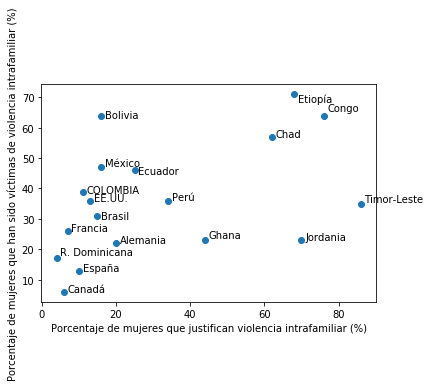

In [241]:
#plt.scatter(atti, prev)
fig, ax = plt.subplots()
ax.scatter(atti, prev)
plt.xlabel('Porcentaje de mujeres que justifican violencia intrafamiliar (%)')
plt.ylabel('Porcentaje de mujeres que han sido víctimas de violencia intrafamiliar (%)')
for i in range(len(loca)):
    ax.annotate(d_code[loca[i]], (atti[i]+1, prev[i]+np.random.randn()*1-0.5))